In [1]:
import numpy as np
#%load_ext cudf.pandas
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType, Normalization

In [2]:
df1 = pd.read_csv('engine_system.csv')

In [3]:
df1.head()

,Unnamed: 0,61444-513,61444-512,61443-91
0,7,28.0,34.0,19.2
1,37,45.0,7.0,0.0
2,67,7.0,0.0,0.0
3,97,32.0,0.0,0.0
4,127,15.0,15.0,0.0


In [4]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df1.shape

(126729, 3)

In [6]:
seq_len = 250 
model = DGAN(DGANConfig(
    max_sequence_len=seq_len,
    sample_len=1,
    feature_num_layers=5,                       #was 4
    feature_num_units=50,                      #was 50
    feature_noise_dim=30,
    batch_size=1000,
    epochs=5000,  # For real data sets, 100-1000 epochs is typical     #was 5k
))

model.train_dataframe(
    df1,
    df_style= "long",
    feature_columns=['61443-91', '61444-512', '61444-513'],
)

2024-04-17 11:27:43,853 : MainThread : WARNING : Example ID column not provided, DGAN will autosplit dataset into sequences of size 250!
2024-04-17 11:27:45,759 : MainThread : INFO : epoch: 0
2024-04-17 11:27:46,902 : MainThread : INFO : epoch: 1
2024-04-17 11:27:46,973 : MainThread : INFO : epoch: 2
2024-04-17 11:27:47,047 : MainThread : INFO : epoch: 3
2024-04-17 11:27:47,103 : MainThread : INFO : epoch: 4
2024-04-17 11:27:47,168 : MainThread : INFO : epoch: 5
2024-04-17 11:27:47,233 : MainThread : INFO : epoch: 6
2024-04-17 11:27:47,292 : MainThread : INFO : epoch: 7
2024-04-17 11:27:47,356 : MainThread : INFO : epoch: 8
2024-04-17 11:27:47,413 : MainThread : INFO : epoch: 9
2024-04-17 11:27:47,481 : MainThread : INFO : epoch: 10
2024-04-17 11:27:47,536 : MainThread : INFO : epoch: 11
2024-04-17 11:27:47,592 : MainThread : INFO : epoch: 12
2024-04-17 11:27:47,651 : MainThread : INFO : epoch: 13
2024-04-17 11:27:47,712 : MainThread : INFO : epoch: 14
2024-04-17 11:27:47,771 : MainThr

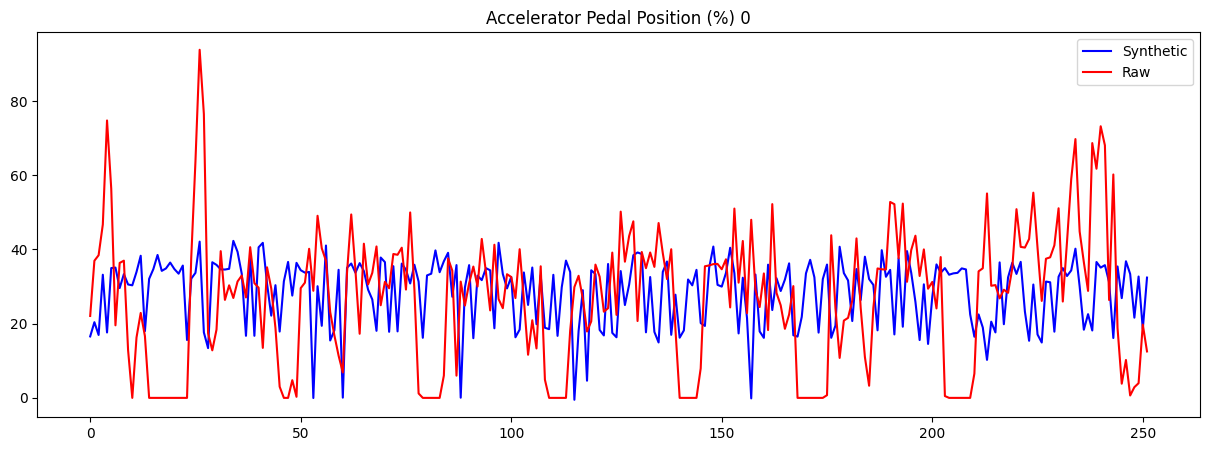

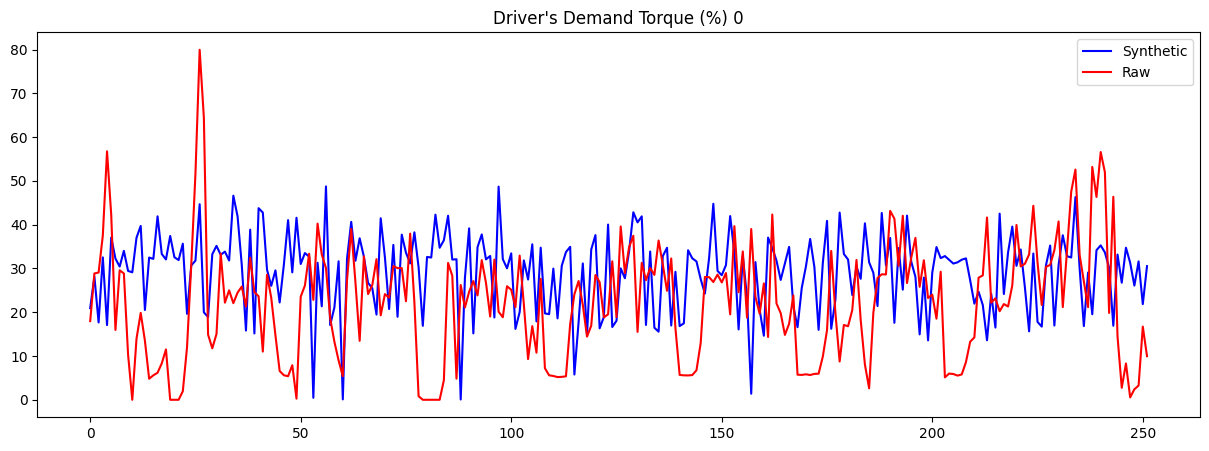

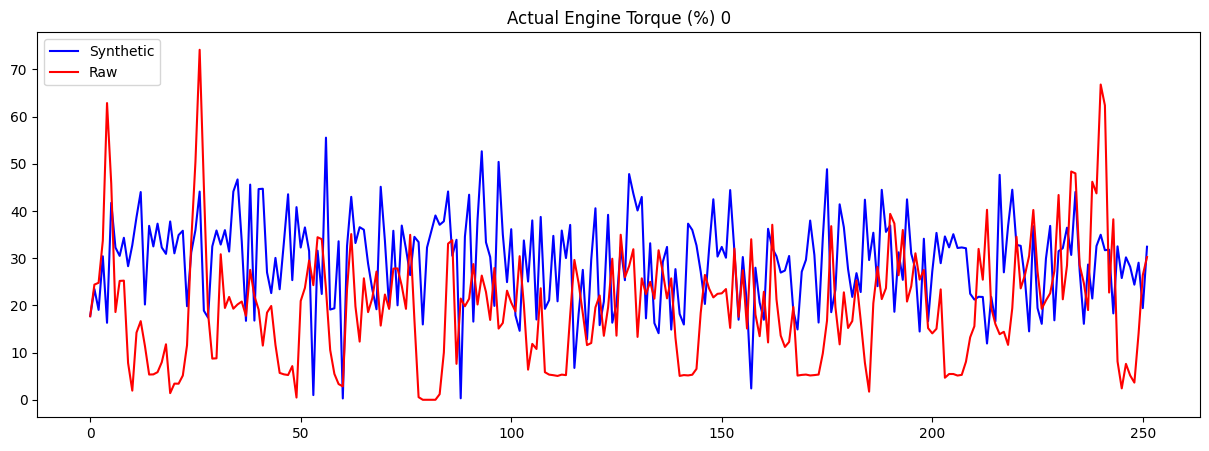

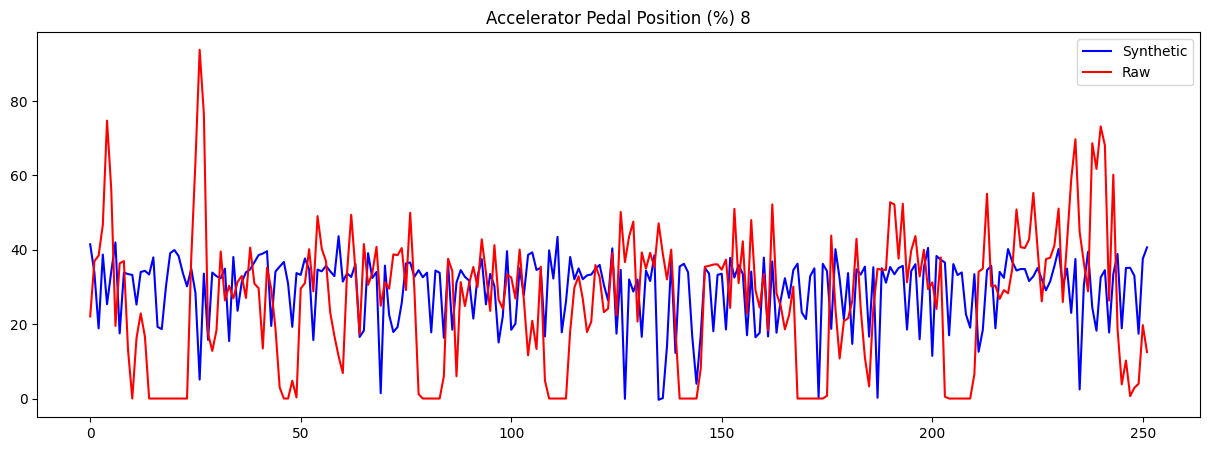

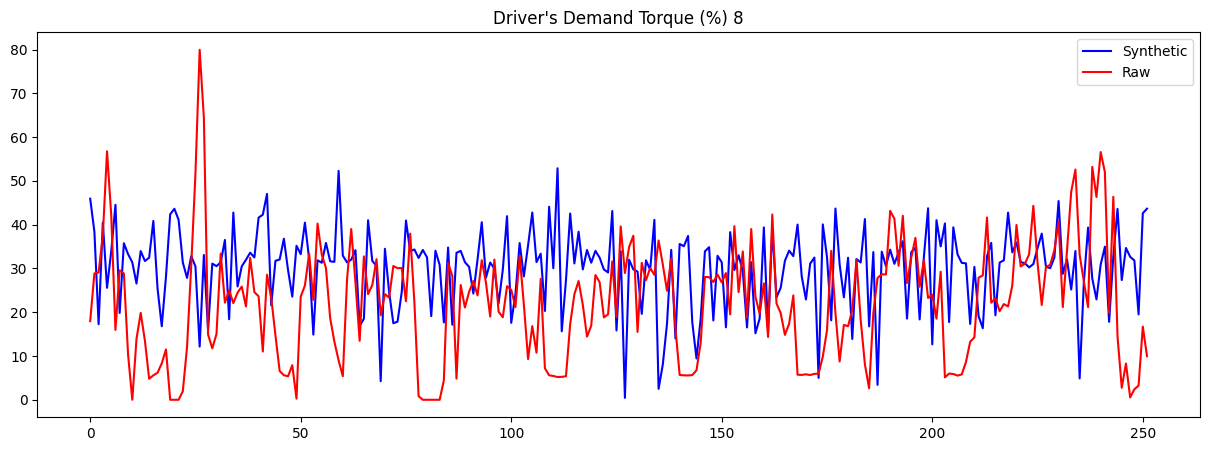

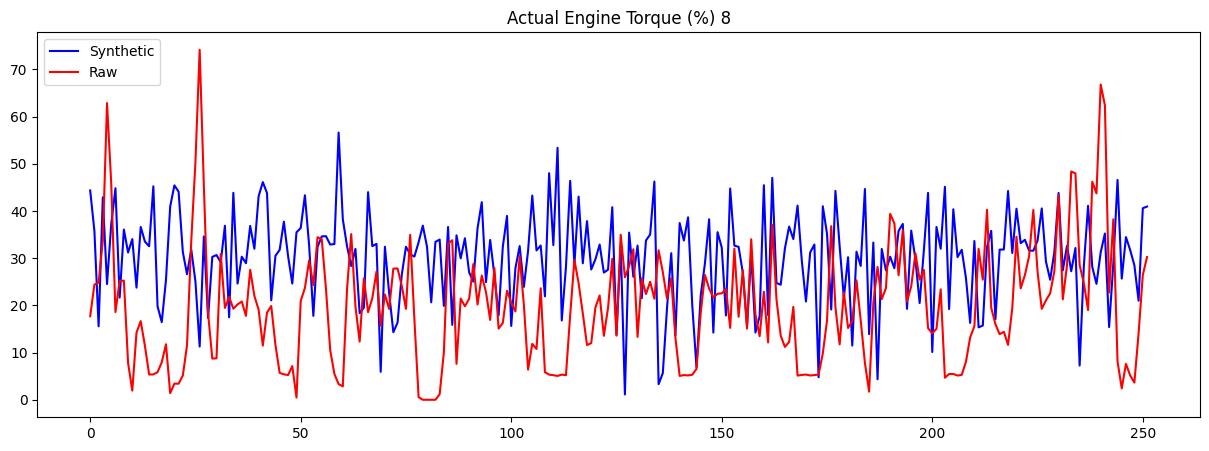

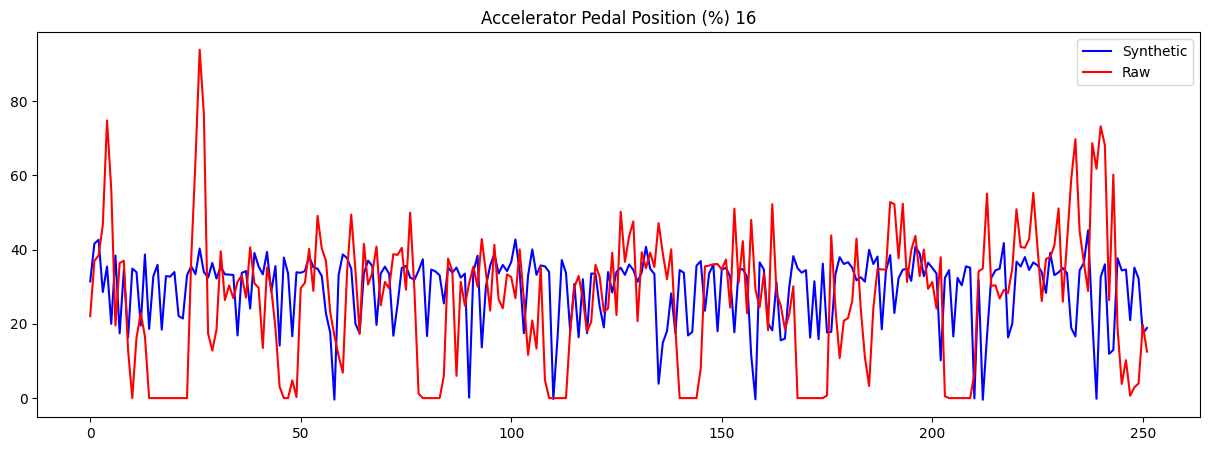

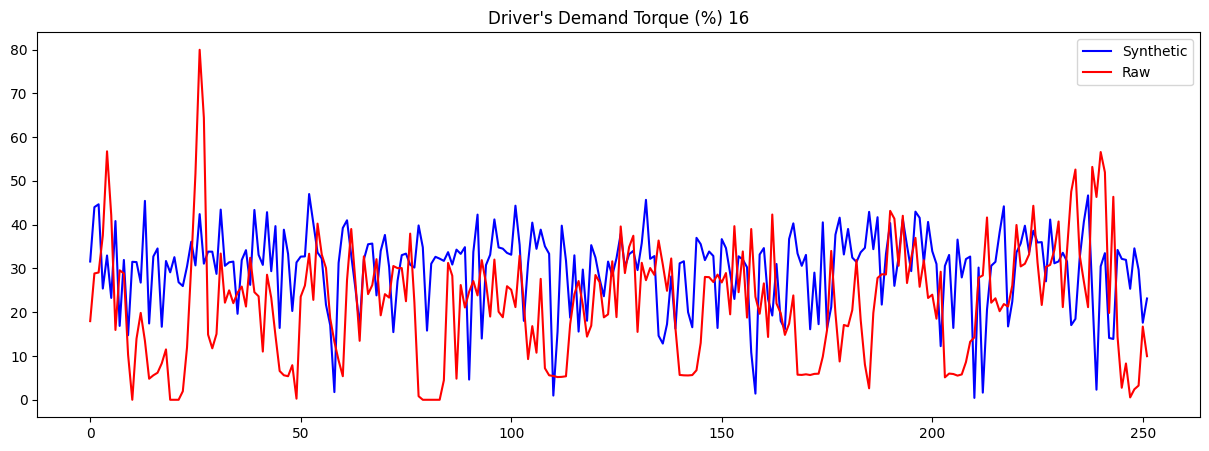

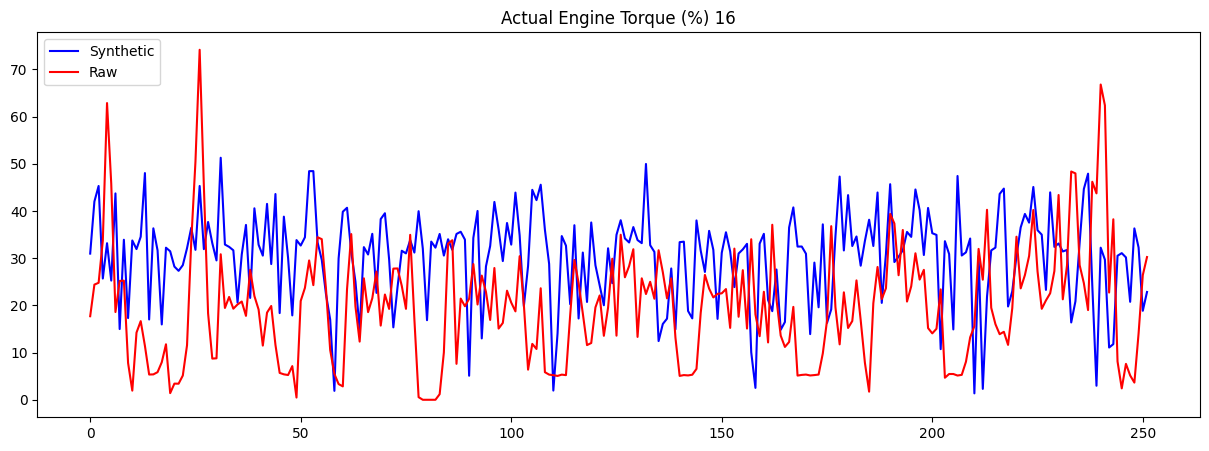

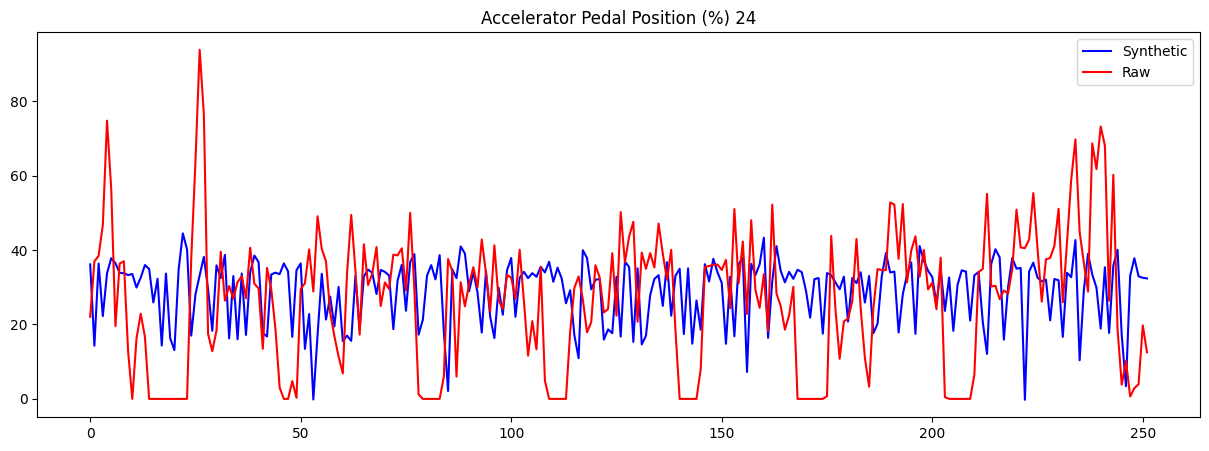

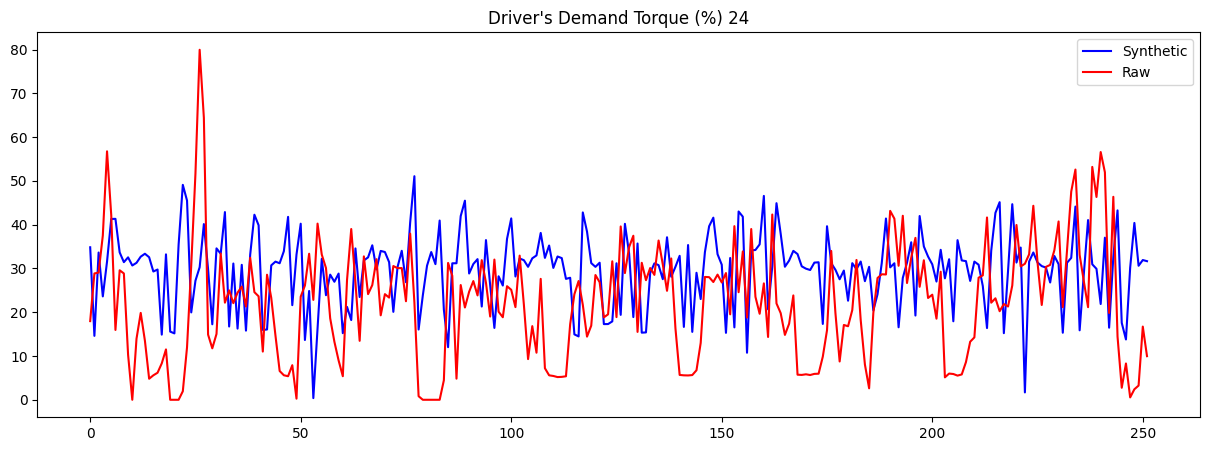

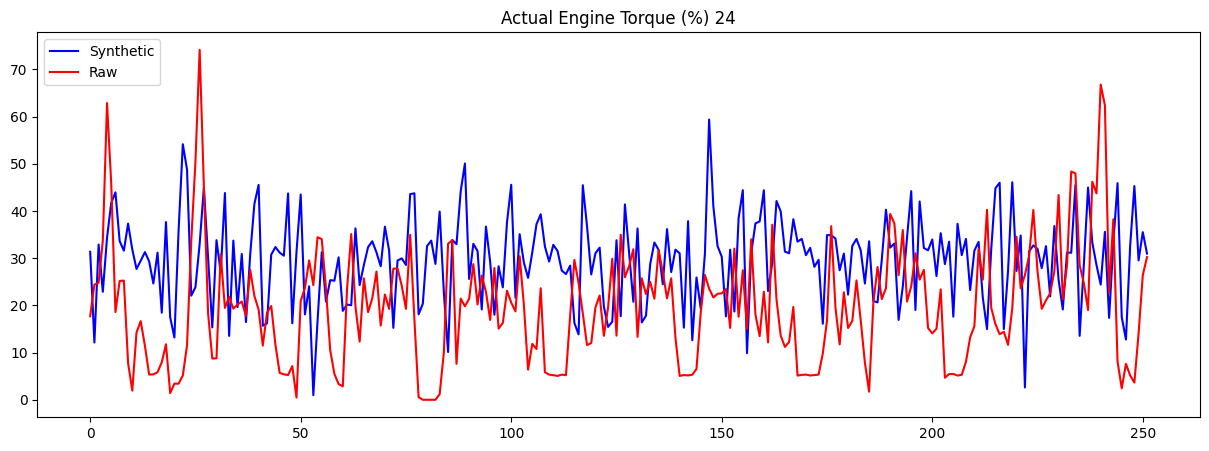

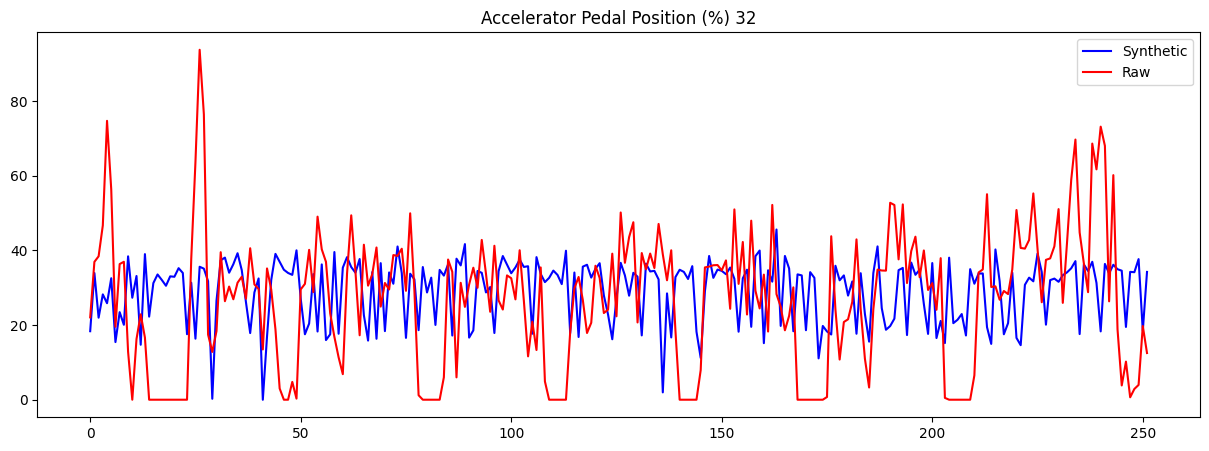

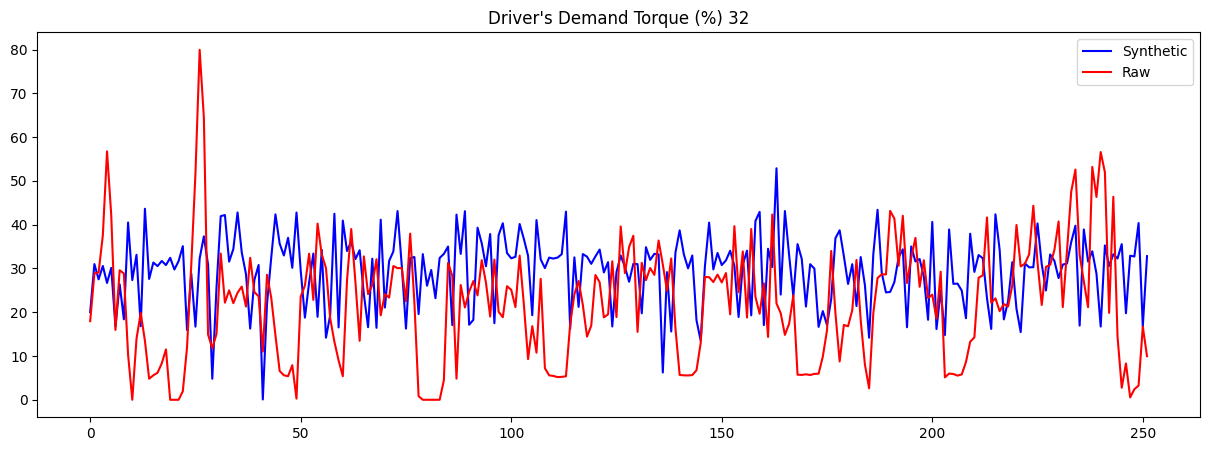

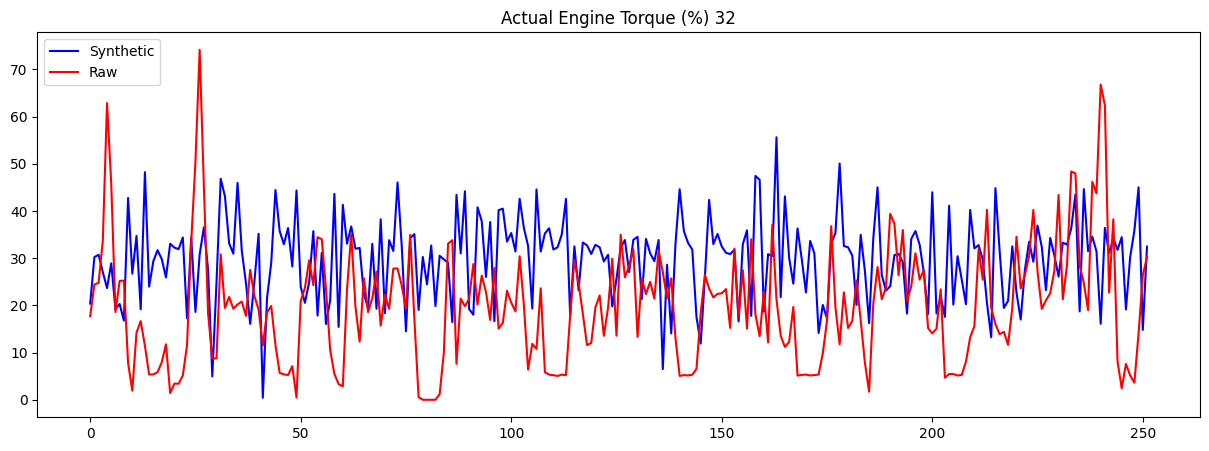

In [7]:
df = df1.copy()
path = 'Generated_engine_sys_data'
for i in range(40):
    name = path+"\\synthetic_engine_"+str(i)+".csv"
    

    # Generate synthetic data
    synthetic_df = model.generate_dataframe(int(len(df)/seq_len))

    synthetic_df
    w = 500
    if i % 8 == 0:
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Accelerator Pedal Position (%) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Driver\'s Demand Torque (%) '  + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Actual Engine Torque (%) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()

    synthetic_df.to_csv(name)
    del synthetic_df
plt.show()

In [8]:
sdf = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Generated_engine_sys_data\synthetic_engine_32.csv')
sdf.drop(['Unnamed: 0', 'example_id'], axis=1, inplace=True)

In [9]:
sdf.head()

,61444-513,61444-512,61443-91
0,9.357025,8.770687,1.397300
1,9.218211,8.680107,1.534108
2,9.155566,8.640270,1.448569
3,9.149342,8.649568,1.455440
4,9.148475,8.654458,1.452932


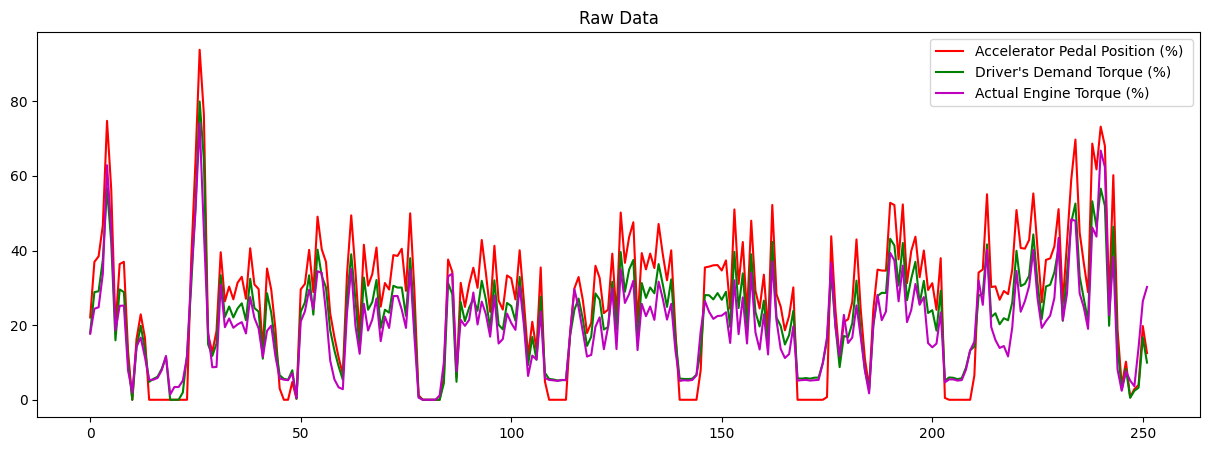

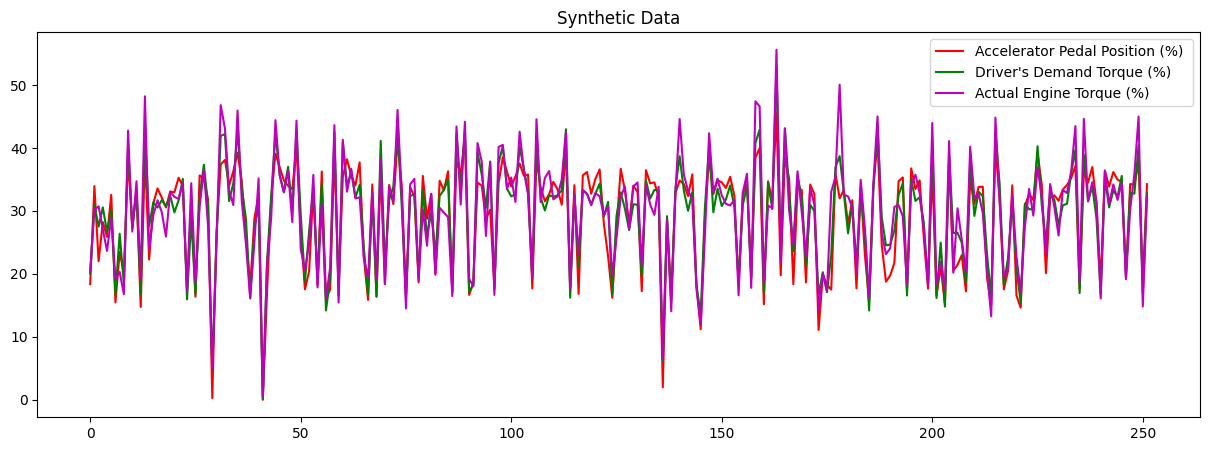

In [10]:
w=500
plt.figure(figsize=(15,5))
v2 = df1['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v3 = df1['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v4 = df1['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('Raw Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Driver\'s Demand Torque (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Actual Engine Torque (%) ')
plt.legend()
plt.figure(figsize=(15,5))
v2 = sdf['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v3 = sdf['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v4 = sdf['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
plt.title('Synthetic Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Driver\'s Demand Torque (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Actual Engine Torque (%) ')
plt.legend()
plt.show()


In [11]:
df1.corr()

,61444-513,61444-512,61443-91
61444-513,1.000000,0.825254,0.813309
61444-512,0.825254,1.000000,0.942059
61443-91,0.813309,0.942059,1.000000


In [12]:
sdf.corr()

,61444-513,61444-512,61443-91
61444-513,1.000000,0.959918,0.903000
61444-512,0.959918,1.000000,0.952932
61443-91,0.903000,0.952932,1.000000


In [13]:
df1.describe()

,61444-513,61444-512,61443-91
count,126729.000000,126729.000000,126729.000000
mean,19.722423,22.104396,26.583216
std,22.373022,25.956896,31.386742
min,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,6.000000,7.000000,0.000000
75%,36.000000,43.000000,54.800000
max,95.000000,99.000000,100.000000


In [14]:
sdf.describe()

,61444-513,61444-512,61443-91
count,126500.000000,126500.000000,126500.000000
mean,29.722599,29.451746,29.087449
std,13.210522,12.237713,12.842084
min,-0.221354,0.001526,-1.475079
25%,27.937460,29.032047,30.514366
50%,32.032330,32.134094,33.809981
75%,34.179356,34.321760,35.846832
max,66.090200,56.718143,49.968895


In [15]:
def moving_avg(x, N=1000):          #function to compute moving average
    return np.convolve(x, np.ones((N,))/N, mode='valid')

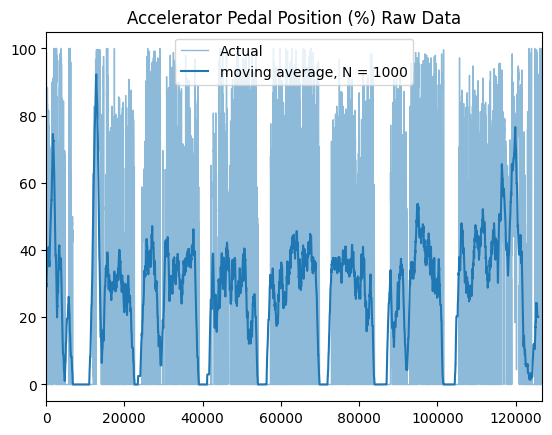

In [16]:

plt.plot(df1['61443-91'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61443-91'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61443-91']))
plt.title('Accelerator Pedal Position (%) Raw Data')
plt.legend()
plt.show()


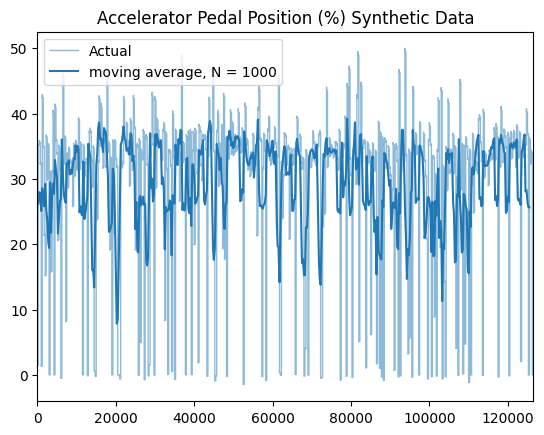

In [17]:
plt.plot(sdf['61443-91'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61443-91'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61443-91']))
plt.title('Accelerator Pedal Position (%) Synthetic Data')
plt.legend()
plt.show()

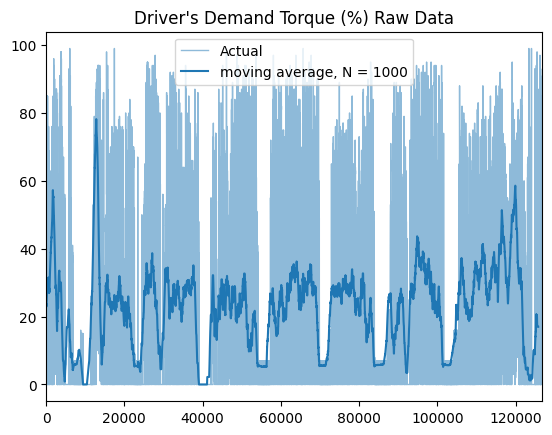

In [18]:
plt.plot(df1['61444-512'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61444-512'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61444-512']))
plt.title('Driver\'s Demand Torque (%) Raw Data')
plt.legend()
plt.show()

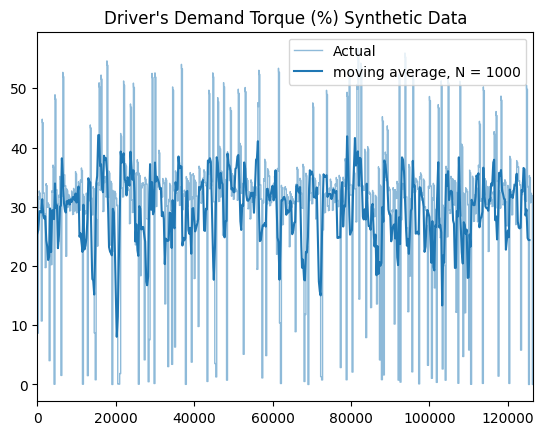

In [19]:
plt.plot(sdf['61444-512'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61444-512'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61444-512']))
plt.title('Driver\'s Demand Torque (%) Synthetic Data')
plt.legend()
plt.show()

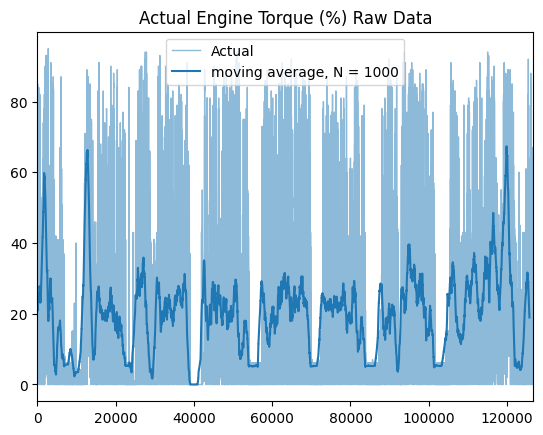

In [20]:
plt.plot(df1['61444-513'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61444-513'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61444-513']))
plt.title('Actual Engine Torque (%) Raw Data')
plt.legend()
plt.show()

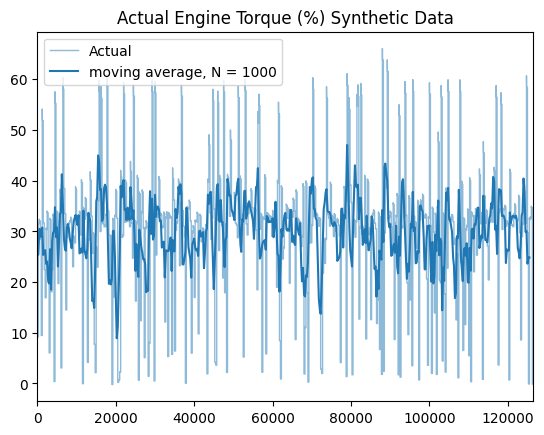

In [21]:
plt.plot(sdf['61444-513'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61444-513'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61444-513']))
plt.title('Actual Engine Torque (%) Synthetic Data')
plt.legend()
plt.show()